# Tutorial 1: Data Preprocessing

---

### Introduction

Welcome! This tutorial will show you how to visualise and preprocess astronomical data using python. From this tutorial, you will learn the following:

1. How to download astronomical data
2. How to read and visualise data
3. How to preprocess imagery data

The data [GalaxyMNIST](https://github.com/mwalmsley/galaxy_mnist) contains 10,000 images of galaxies (either 3x64x64 or 3x224x224), labelled by Galaxy Zoo volunteers as belonging to one of four morphology classes, where the classes are:

0. smooth and round
1. smooth and cigar-shaped
2. edge-on-disk
3. unbarred spiral

The galaxies are selected from `Galaxy Zoo DECaLS Campaign` A (GZD-A). The images are shown to volunteers on Galaxy Zoo for them to classify. For each image, at least 17 people were asked the necessary questions, and at least half of them must have answered with the given class. The class labels are, therefore, much more confident than, for example, simply labelling with the most common answer to some question. For more info, visit this [link](https://github.com/mwalmsley/galaxy_mnist)


Labelling data is a big topic in machine learning. Labelled data allow us to use supervised machine learning tools to train on labelled data and classify unlabeled ones. However, labelling data can be costly. Scientists have been trying to figure out a way to label data, but the easiest is that we can depend on human knowledge to label data like the `Galaxy Zoo DECaLS Campaign`.  However, unlabeled data can also be of some benefit if analyzed with the right tools, like unsupervised machine learning. Those tools allow us to explore (find patterns) and cluster the data, leading to discoveries in the data.


---

### Downloading data

First, let us call the python script that will let us download the data.

In [ ]:
from IPython.display import clear_output

In [ ]:
%pip install git+https://github.com/mwalmsley/galaxy_mnist.git
%pip install torch torchvision
clear_output()

In [ ]:
# https://github.com/mwalmsley/galaxy_mnist
from galaxy_mnist import GalaxyMNISTHighrez

'GalaxyMNISTHighrez' class has the following attributes: 
 - `root`: Specifing the target directory to download the data
 - `download:` A boolean value, `True` to download the images
 - `train:` A boolean value, `True` to download just the training data, `False` will download just the testing data.
   - `Notice:` The data has a fixed 80/20 train/test division.

In [ ]:
# for the training data
dataset_train = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=True  # by default True, or False for canonical test set
)
# for the testing data
dataset_test = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=False  # by default True, or False for canonical test set
)

100%|██████████| 900487097/900487097 [00:14<00:00, 60079696.88it/s]


Extracting data_import/data/GalaxyMNISTHighrez/raw/train_dataset.hdf5.gz to data_import/data/GalaxyMNISTHighrez/raw


100%|██████████| 225656501/225656501 [00:07<00:00, 31740331.67it/s]


Extracting data_import/data/GalaxyMNISTHighrez/raw/test_dataset.hdf5.gz to data_import/data/GalaxyMNISTHighrez/raw


---

### Reading data

First, let's read the inputs `images` and the outputs `labels` into two seperate variables.

In [ ]:
images_train = dataset_train.data
labels_train = dataset_train.targets

Now check the shapes and data types to see they are consistent.

In [ ]:
print("Shape of the input (training): "+str(images_train.shape)+ ", type: "+ str(images_train.dtype))
print("Shape of the output (training): "+str(labels_train.shape)+ ", type: "+ str(labels_train.dtype))

Shape of the input (training): torch.Size([8000, 3, 224, 224]), type: torch.uint8
Shape of the output (training): torch.Size([8000]), type: torch.int64


We notice the following:
 1. The input data has 8000 samples with 3 channels, which stand for `rgb` colors, where each sample has a size of 224 x 224.
 2. The output is a one-dimensional array which contains the labels of the samples. Each label is 0,1,2,3 according to the categories listed in the first cell above. 

**Exercise 1:**
Store the testing set inputs and outputs into two different variables, and display their shapes and data types.

In [ ]:
### -- Code here --
images_test = dataset_test.data
labels_test = dataset_test.targets

In [ ]:
print("Shape of the input (testing): "+str(images_test.shape)+ ", type: "+ str(images_test.dtype))
print("Shape of the output (testing): "+str(labels_test.shape)+ ", type: "+ str(labels_test.dtype))

Shape of the input (testing): torch.Size([2000, 3, 224, 224]), type: torch.uint8
Shape of the output (testing): torch.Size([2000]), type: torch.int64


There are 2000 samples to testing

Now, let's check the frequencies of the labels/output. First we display the output.

In [ ]:
GalaxyMNISTHighrez.classes

['smooth_round', 'smooth_cigar', 'edge_on_disk', 'unbarred_spiral']

   Where (as indicated in the first cell):
   - 0: `smooth_round`,
   - 1: `smooth_cigar`,
   - 2: `edge_on_disk`,
   - 3: `unbarred_spiral`

Next use numpy functions to summarize the number in each class

In [ ]:
import numpy as np # For handling N-DIMENSIONAL ARRAYS

In [ ]:
print(labels_train)
labels_trainNP = np.array(labels_train)
unique_labels, count_labels = np.unique(labels_trainNP, return_counts=True)
print("Label, count:", unique_labels, count_labels)

tensor([1, 1, 3,  ..., 3, 2, 0])
Label, count: [0 1 2 3] [1993 1994 1993 2020]


Se puede notar que los datos estan balancedos!!!

### Data visualisation

We can also try to visualise label frequencies in a bar graph. To do this, we need the `pyplot' graphics package.

In [ ]:
import matplotlib.pyplot as plt #This displays graphs once they have been created

The code for plotting is below. To make a clear display, we replace class labels with the actual class names.

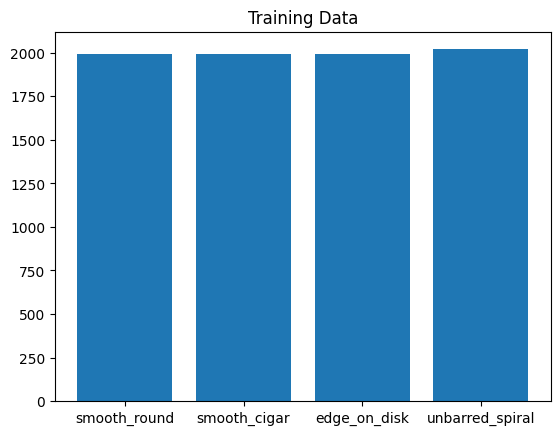

In [ ]:
plt.bar(range(len(unique_labels)), count_labels, align='center')
plt.xticks(range(len(unique_labels)), GalaxyMNISTHighrez.classes)
plt.title('Training Data')
plt.show()

In [ ]:
labels_testNP = np.array(labels_test)
unique_labels_test, count_labels_test = np.unique(labels_testNP, return_counts=True)
print("Label, count:", unique_labels_test, count_labels_test )

Label, count: [0 1 2 3] [507 506 507 480]


**Exercise 2:**
Count the class frequencies for the testing data, and visualise using a histogram.

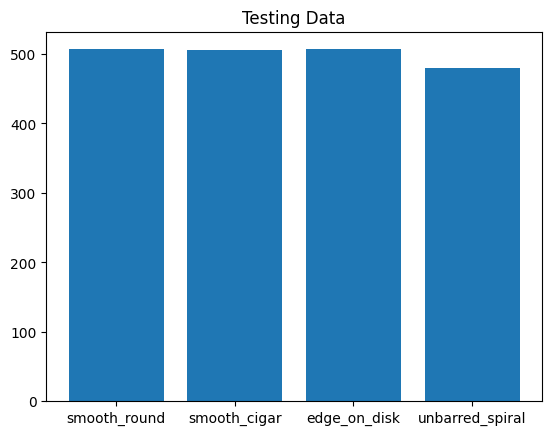

In [ ]:
### -- Code here --
plt.bar(range(len(unique_labels_test)), count_labels_test, align='center')
plt.xticks(range(len(unique_labels_test)), GalaxyMNISTHighrez.classes)
plt.title('Testing Data')
plt.show()

Now let us take a look at the images of the different galaxy shapes.

In [ ]:
from PIL import Image #  PIL is the Python Imaging Library

label: smooth_round


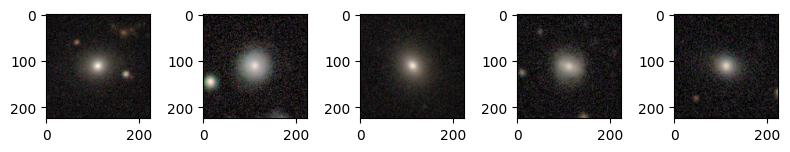

label: smooth_cigar


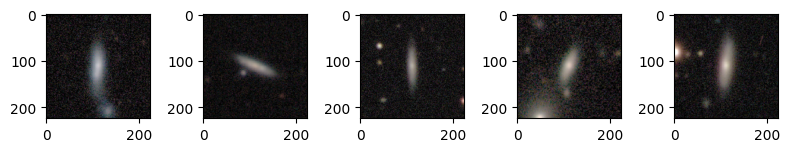

label: edge_on_disk


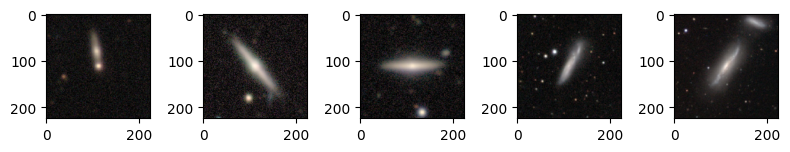

label: unbarred_spiral


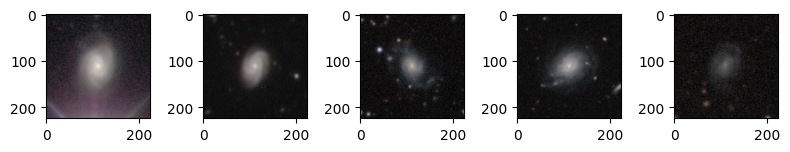

In [ ]:
# Display nImage images for each class
nImage = 5
# Loop through classes
for j in range(len(GalaxyMNISTHighrez.classes)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (nImage):    # Create images in each column
        train_image = images_train[(labels_train == j)][i]
        fig.add_subplot(1, nImage, i+1)
        plt.imshow(np.array(train_image).transpose(1, 2, 0))
    print("label: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show()

The resolution between classes seems unclear. For instance, `smooth cigar` and `edge_on_disk` look like each other. this will decrease accuracy when performing classification or clustering.

---

### Data preprocessing

Classical machine learning often subjects the data to extensive preprocessing before classification, especially when the datasets involved are relatively small. Preprocessing functions include feature extraction, optimization, normalization, augmentation, cropping, resizing, denoising, and so on. For each of these functions, there are many alternative algorithms. 

On the other hand, deep learning models with lots of data are often referred to as End-to-End learning models ([E2E](https://towardsdatascience.com/e2e-the-every-purpose-ml-method-5d4f20dafee4)), since they can extract information from raw data.

In the following tutorial, we will use an [_autoencoder_](https://en.wikipedia.org/wiki/Autoencoder), which uses deep learning to extract features. In theory, we can feed the raw data into the autoencoder without any preprocessing. However, in practice this greatly increases the computation time required. In this tutorial series we need to train the models in a reasonable time so that we can bring the idea across. The issue is especially important because optimal use of raw data requires hyperparameter tuning, which is even more time consuming.

However, preprocessing has a caveat. We need to make sure that the preprocessing does not lose any useful information. How can we verify this? In our case, since the data is imagery data we can examine the preprocessed images visually. If we can still easily classify them, then we can conclude that the preprocessing is effective.

Using an autoencoder is just one possibility. Participants are encouraged to explore alternatives.

In this tutorial, we will try to reduce the complexity of the data by doing the following:
   - Convert images to grayscale (reduces data size by a factor  of 3)
   - Reduce the size of the image by a factor of 4.

#### A. Grayscaling
We begin with conversion to grayscale, following this [tutorial](https://www.tutorialspoint.com/pytorch-how-to-convert-an-image-to-grayscale) from [tutorialspoint.com](https://www.tutorialspoint.com).

In [ ]:
import torchvision.transforms as transforms #Transforms are for common image transformations

In [ ]:
# Display the shape of image data
images_train.shape

torch.Size([8000, 3, 224, 224])

We can see that the original image size has three channels which stand for the RGB colours. Now let us perfom the grayscalling.

In [ ]:
transformGrey = transforms.Grayscale()
images_trainGrey = transformGrey(images_train)

Now let us check the size of the resulting tensor

In [ ]:
images_trainGrey.shape

torch.Size([8000, 1, 224, 224])

we can see the number of channels went down from 3 to 1

**Exercise 3:**
Display a set grayscale images for each classes (like the display of images above)

label: smooth_round


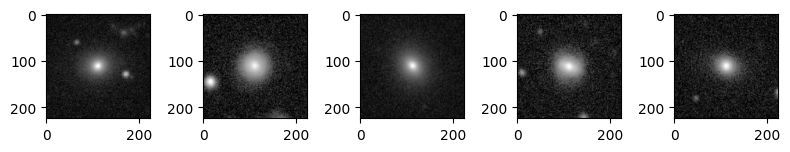

label: smooth_cigar


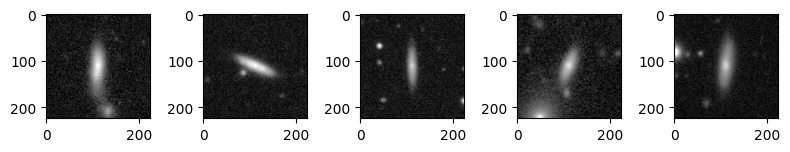

label: edge_on_disk


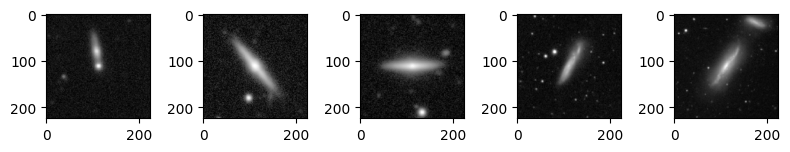

label: unbarred_spiral


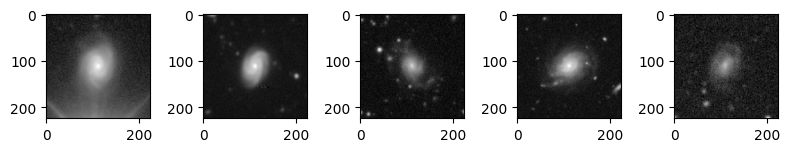

In [ ]:
### -- Code here__
# Display nImage images for each class in grayscale
nImage = 5
# Loop through classes
for j in range(len(GalaxyMNISTHighrez.classes)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (nImage):    # Create images in each column
        train_image = images_trainGrey[(labels_train == j)][i]
        fig.add_subplot(1, nImage, i+1)
        plt.imshow(np.array(train_image).transpose(1, 2, 0),cmap='gray')
    print("label: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show()

We can notice that visually that nothing changed much from the original data. However, we reduced the complexity of the data by a favour of 3, which is enormous!

#### B. Image resizing  
(see  [this reference](https://www.tutorialspoint.com/pytorch-how-to-resize-an-image-to-a-given-size))

Reducing the size of the image can further reduce the complexity of the image data. However, we must be careful not to reduce so much as to removed distinctions between classes.

In [ ]:
# Define the transform. The number in parenthesis gives number of pixels per side.
transformResize = transforms.Resize(56)

Now let's reduce the grayscale images:

In [ ]:
images_trainResized = transformResize(images_trainGrey)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Check the size again:

In [ ]:
images_trainResized.shape

torch.Size([8000, 1, 56, 56])

**Exercise 4:**
Visualise the resized images for all classes

label: smooth_round


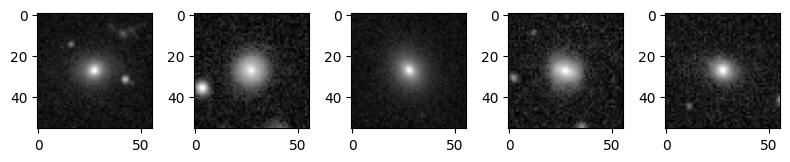

label: smooth_cigar


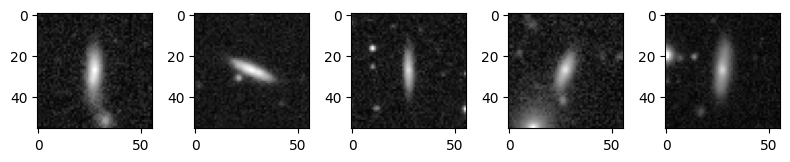

label: edge_on_disk


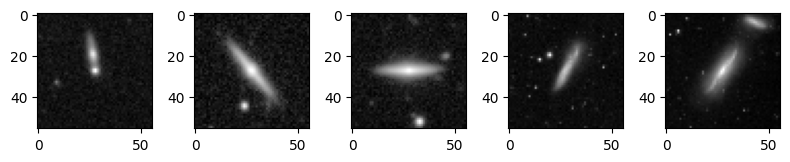

label: unbarred_spiral


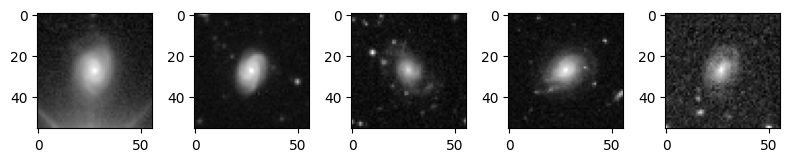

In [ ]:
#___ Code here___
# Display nImage images for each class in grayscale
nImage = 5
# Loop through classes
for j in range(len(GalaxyMNISTHighrez.classes)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (nImage):    # Create images in each column
        train_image = images_trainResized[(labels_train == j)][i]
        fig.add_subplot(1, nImage, i+1)
        plt.imshow(np.array(train_image).transpose(1, 2, 0), cmap='gray')
    print("label: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show()


##### **_End of the pre-processing pipeline_**

Now the above pre-processing is not the only way where we can reduce the features, the following can also be done:
1. Cropping images away from the centre
2. Image segmentation, maybe to remove background noise (Deep learning can be used for this)
3. Explore ...

### Normalization

The pixel levels run from 0 to 255. If we divide by 255, we will put the levels within a standard scale of 0 to 1. Then they are suitable to use with other features that are similarly normalised. ([source](https://developers.google.com/machine-learning/data-prep/transform/normalization)).

In [ ]:
images_trainPre = images_trainResized/255

Now let us check the values for one image before and after the nomalisation.

In [ ]:
print("Pixel levels before normalization:")
print(images_trainResized[0][0][0])
print("Pixel levels after  normalization:")
print(images_trainPre[0][0][0])

Pixel levels before normalization:
tensor([24, 35, 16, 27, 11, 20,  7, 15, 15, 19, 14, 11,  5, 15, 37, 25, 17, 22,
        12, 22, 12,  6, 20,  5, 18, 15, 14, 31, 14, 12, 27, 18, 28, 22, 25, 17,
        25,  6,  5, 26, 22,  2, 14, 12, 14,  7, 16, 26, 12, 19, 13, 34, 36, 17,
        13, 20], dtype=torch.uint8)
Pixel levels after  normalization:
tensor([0.0941, 0.1373, 0.0627, 0.1059, 0.0431, 0.0784, 0.0275, 0.0588, 0.0588,
        0.0745, 0.0549, 0.0431, 0.0196, 0.0588, 0.1451, 0.0980, 0.0667, 0.0863,
        0.0471, 0.0863, 0.0471, 0.0235, 0.0784, 0.0196, 0.0706, 0.0588, 0.0549,
        0.1216, 0.0549, 0.0471, 0.1059, 0.0706, 0.1098, 0.0863, 0.0980, 0.0667,
        0.0980, 0.0235, 0.0196, 0.1020, 0.0863, 0.0078, 0.0549, 0.0471, 0.0549,
        0.0275, 0.0627, 0.1020, 0.0471, 0.0745, 0.0510, 0.1333, 0.1412, 0.0667,
        0.0510, 0.0784])


**Exercise 5**: Perform the preprocessing pipeline but on the testing set

In [ ]:
#___ Code here___
images_testGrey = transformGrey(images_test)
print("Test Gray Scale: ",images_testGrey.shape)
images_testResized = transformResize(images_testGrey)
print("Test Gray Scale Resized: ", images_testResized.shape)
images_testPre = images_testResized/255
print("Pixel levels before normalization:")
print(images_testResized[0][0][0])
print("Pixel levels after  normalization:")
print(images_testPre[0][0][0])

Test Gray Scale:  torch.Size([2000, 1, 224, 224])
Test Gray Scale Resized:  torch.Size([2000, 1, 56, 56])
Pixel levels before normalization:
tensor([18, 30, 21, 14, 17, 27, 25, 36, 35, 19, 24, 21, 32, 18, 24, 15, 18, 10,
        19, 32, 30, 17, 21, 17, 25, 19, 13, 17, 21, 18, 26, 28, 16, 15, 41, 18,
        17, 30, 20, 16, 40, 14, 15, 17, 14, 15, 18, 20, 26, 25, 18, 22, 11, 17,
        17, 23], dtype=torch.uint8)
Pixel levels after  normalization:
tensor([0.0706, 0.1176, 0.0824, 0.0549, 0.0667, 0.1059, 0.0980, 0.1412, 0.1373,
        0.0745, 0.0941, 0.0824, 0.1255, 0.0706, 0.0941, 0.0588, 0.0706, 0.0392,
        0.0745, 0.1255, 0.1176, 0.0667, 0.0824, 0.0667, 0.0980, 0.0745, 0.0510,
        0.0667, 0.0824, 0.0706, 0.1020, 0.1098, 0.0627, 0.0588, 0.1608, 0.0706,
        0.0667, 0.1176, 0.0784, 0.0627, 0.1569, 0.0549, 0.0588, 0.0667, 0.0549,
        0.0588, 0.0706, 0.0784, 0.1020, 0.0980, 0.0706, 0.0863, 0.0431, 0.0667,
        0.0667, 0.0902])


In [ ]:
images_trainPre.shape

torch.Size([8000, 1, 56, 56])

In [ ]:
images_testPre.shape

torch.Size([2000, 1, 56, 56])

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# aplanar las imágenes en un vector unidimensional
X_train = images_trainPre.reshape(8000, -1)
X_test = images_testPre.reshape(2000, -1)

numero_de_componentes = 10

# crear una instancia de PCA con 100 componentes principales
pca = PCA(n_components=numero_de_componentes)

# ajustar y transformar los datos de entrenamiento
X_train_pca = pca.fit_transform(X_train)

# transformar los datos de prueba
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

(8000, 10)

In [ ]:
labels_train.shape

torch.Size([8000])

In [ ]:
X_test_pca.shape

(2000, 10)

In [ ]:
labels_test.shape

torch.Size([2000])

In [ ]:
#Parte Clásica

In [ ]:
# scikit-learn Imports
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
C = [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
kernel = ['linear', 'rbf']
gamma = [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]

In [ ]:
# Create the param grid
param_grid = {'C': C,
               'kernel': kernel,
               'gamma': gamma,
             }
print(param_grid)

{'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]}


In [ ]:
SVC_Model = SVC()

In [ ]:
rf_RandomGrid = RandomizedSearchCV(estimator = SVC_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(X_train_pca, labels_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=4,
                   param_distributions={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3,
                                              1.4],
                                        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2,
                                                  1.3, 1.4],
                                        'kernel': ['linear', 'rbf']},
                   verbose=2)

In [ ]:
#The best parameters that trained the SVC model.
rf_RandomGrid.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1.4}

In [ ]:
best_grid = rf_RandomGrid.best_estimator_

In [ ]:
y_predict_classical = best_grid.predict(X_test_pca)

In [ ]:
metric_report_classical =  classification_report(labels_test, y_predict_classical)

In [ ]:
print(metric_report_classical)

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       507
           1       0.62      0.63      0.63       506
           2       0.61      0.62      0.61       507
           3       0.68      0.55      0.61       480

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000



In [ ]:
cf_matrix = confusion_matrix(labels_test, y_predict_classical)

In [ ]:
import pandas as pd
import seaborn as sns
cm_array_df = pd.DataFrame(cf_matrix, index=GalaxyMNISTHighrez.classes, columns=GalaxyMNISTHighrez.classes)

<Axes: >

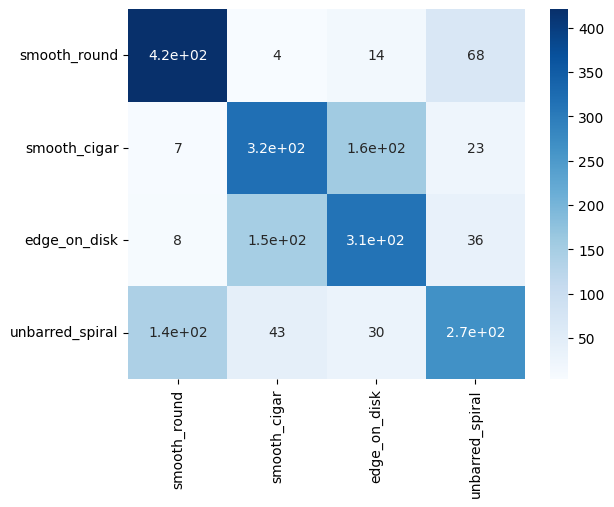

In [ ]:
sns.heatmap(cm_array_df, cmap='Blues', annot=True)

In [ ]:
#Parte cuantica

In [ ]:
!pip install 'qiskit[nature]'
!pip install qiskit[visualization]
!pip install qiskit-machine-learning
!pip install ibm_quantum_widgets
!pip install pylatexenc
clear_output()

In [ ]:
# Qiskit Imports
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit.tools.monitor import job_monitor

In [ ]:
def feature_map(repeats = 1):
  """
  Feature function that encoding the classical data to quantum states
  This function is to use with the qiskit functions
  Args:
      repeats (int): Number of repetitions of the quantum circuit
  Returns:
      The qiskit circuit
  """
  qubits = numero_de_componentes #Number of features (columns) of the training data

  x = ParameterVector('x', length=qubits)
  var_custom = QuantumCircuit(qubits)

  for _ in range(repeats):
      for i in range(qubits):
          var_custom.rx(x[i], i)
      for i in range(qubits):
          for j in range(i + 1, qubits):
              var_custom.cx(i, j)
              var_custom.p(x[i] * x[j], j)
              var_custom.cx(i, j)
      var_custom.barrier()
            
  return var_custom

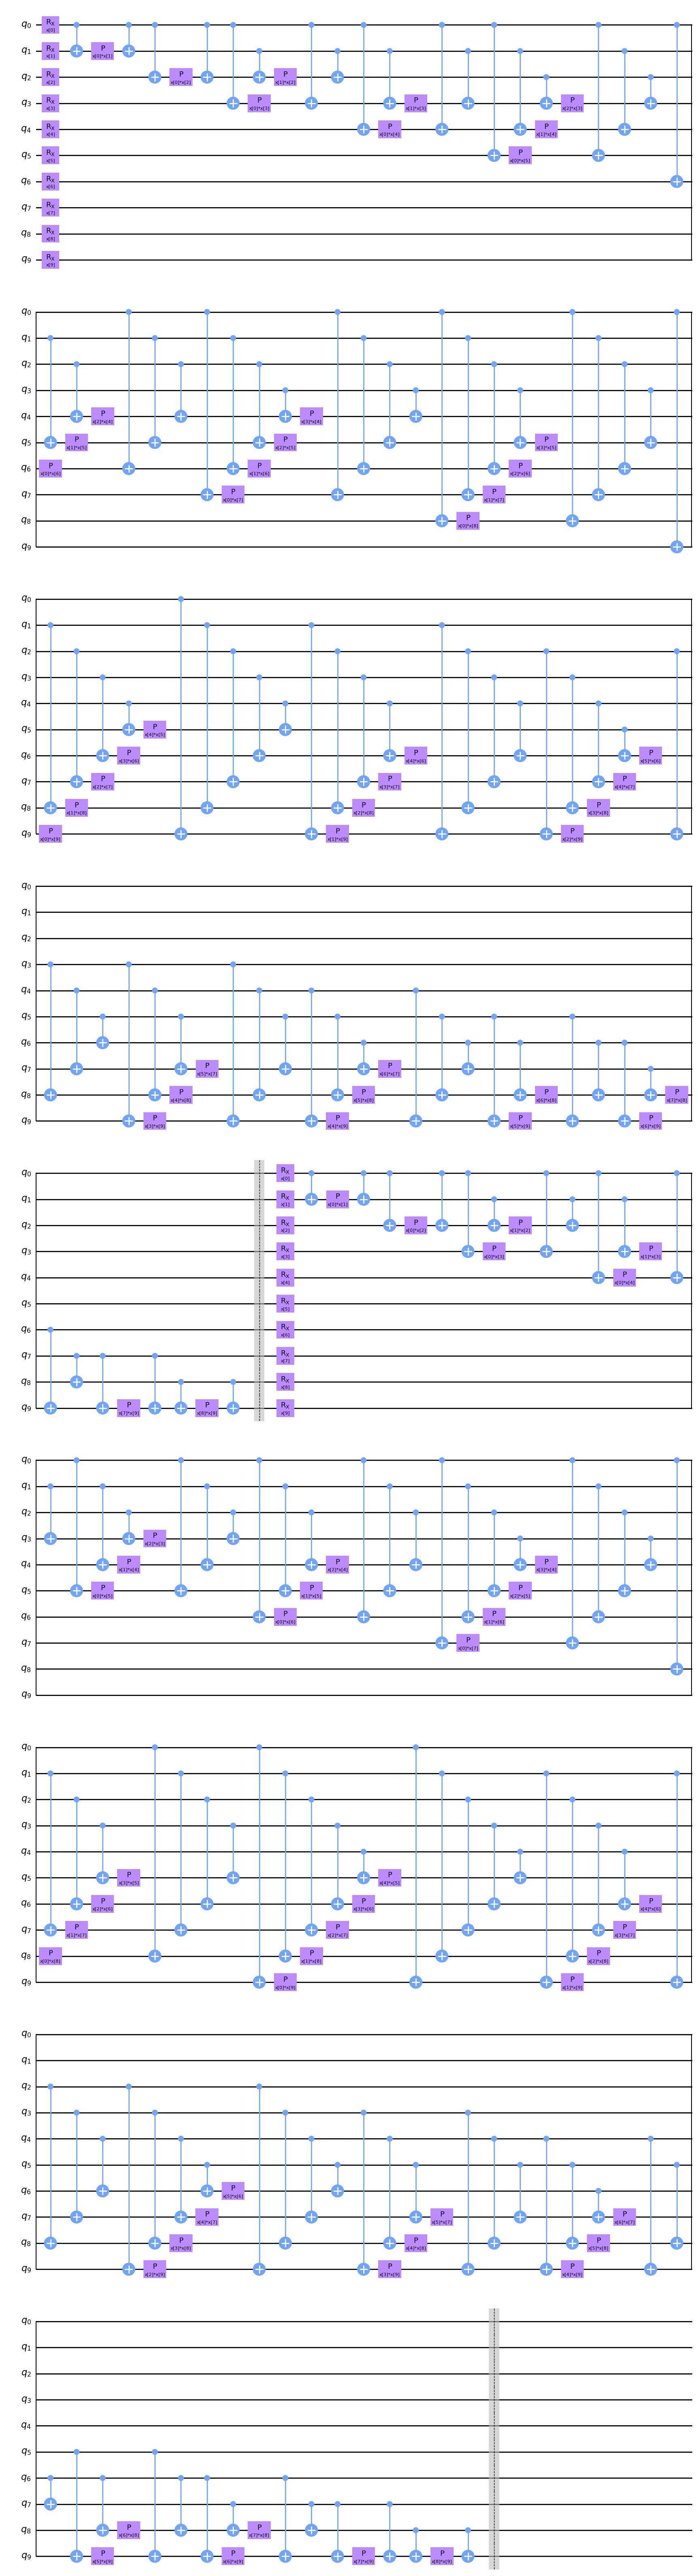

In [ ]:
#Drawing our custom parameterized circuit
feature_map(repeats=2).draw('mpl')

In [ ]:
import time
#Defining the kernel function
custom_kernel_v1 = QuantumKernel(feature_map=feature_map(), quantum_instance=Aer.get_backend('statevector_simulator'))

#Build the kernel matrix to train and test 
st = time.time()
matrix_train_v1 = custom_kernel_v1.evaluate(x_vec=X_train_pca)
matrix_test_v1 = custom_kernel_v1.evaluate(x_vec=X_test_pca, y_vec=X_train_pca)
et = time.time()
elapsed_time = (et - st)
print('Execution time:', elapsed_time, 'seconds')
print(matrix_train_v1.shape)

Execution time: 2148.2544088363647 seconds
(8000, 8000)


In [ ]:
custom_svc_v1 = SVC(kernel='precomputed')
custom_svc_v1.fit(matrix_train_v1, labels_train)

SVC(kernel='precomputed')

In [ ]:
y_predict_v1 = custom_svc_v1.predict(matrix_test_v1)

In [ ]:
metric_report_v1 = classification_report(labels_test, y_predict_v1)

In [ ]:
print(metric_report_v1)

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       507
           1       0.56      0.61      0.59       506
           2       0.57      0.55      0.56       507
           3       0.66      0.43      0.52       480

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.61      2000
weighted avg       0.62      0.62      0.61      2000



---